In [242]:
from PIL import Image
import numpy as np
import os
import cv2
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt

In [243]:
images = 'DRIVE' + os.sep + 'images'
segmented = 'DRIVE' + os.sep + 'segmented'

In [244]:
file = '01_test.tif'
segmented_file = '01_test.png'
# image = np.array(Image.open(images+os.sep+file))[:,:,1]
image = np.array(Image.open(images+os.sep+file))[:,:,1]
segmented_image = np.array(Image.open(segmented+os.sep+segmented_file))

In [245]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_image = clahe.apply(image)

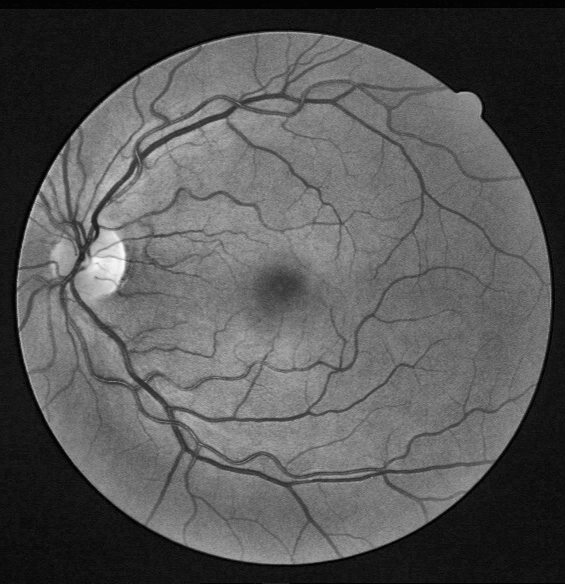

In [246]:
Image.fromarray(cl_image)

In [247]:
threshold = 127
segmented_image1 = segmented_image.copy()
segmented_image1[segmented_image1 >= threshold] = 255 
segmented_image1[segmented_image1 <= threshold]= 0

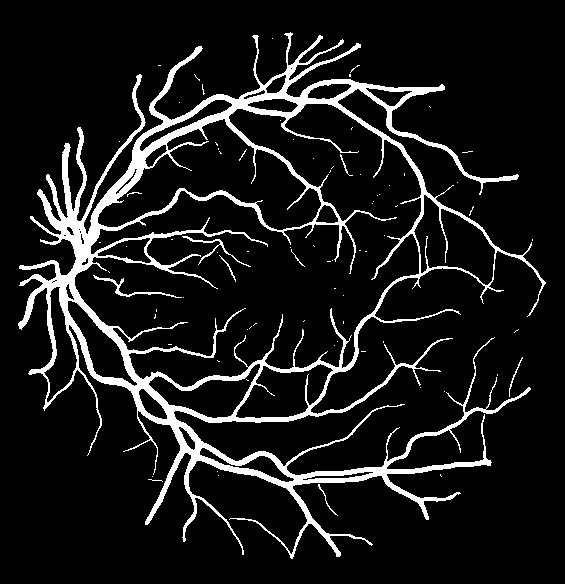

In [248]:
Image.fromarray(segmented_image1)

In [249]:
aggregate_mask = np.ones((3,3))/9

In [250]:
segmented_aggregate = scipy.ndimage.convolve(segmented_image, aggregate_mask)

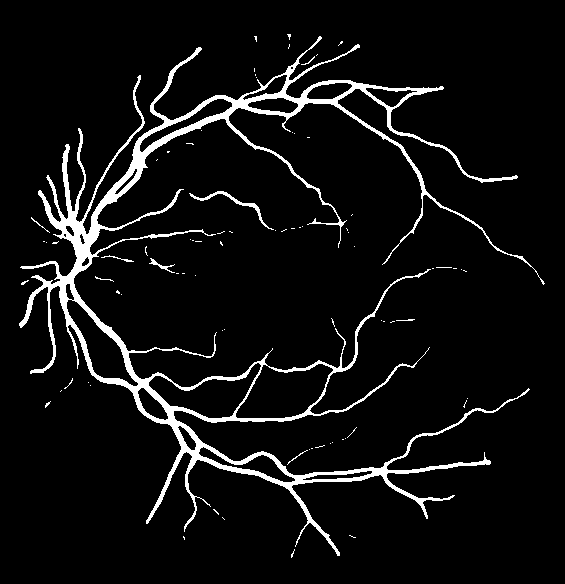

In [284]:
Image.fromarray(segmented_aggregate1)

In [252]:
threshold = 180
segmented_aggregate1 = segmented_aggregate.copy()
segmented_aggregate1[segmented_aggregate1 >= threshold] = 255 
segmented_aggregate1[segmented_aggregate1 <= threshold]= 0

In [253]:
cl = cv2.GaussianBlur(cl_image,(51,51),4,2)
# cl_image = cl.copy()

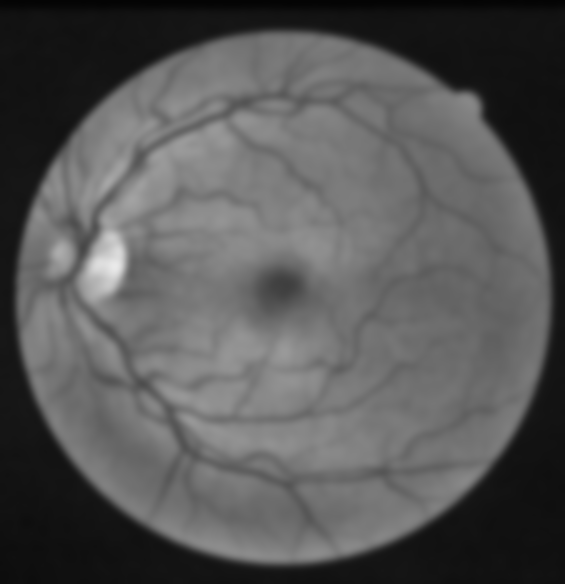

In [254]:
Image.fromarray(cl)

In [255]:
# opticfilter = imagegray[240:280, 80:120]
opticfilter = cl_image[220:300, 60:130]

In [256]:
# Image.fromarray(opticfilter).save('5_filter.png')

In [257]:
opticfilter = np.array(Image.open('5_filter.png'))

In [258]:
opticfilter_norm = opticfilter / opticfilter.sum()

In [259]:
opticfilter_norm.sum()

1.0

In [260]:
from PIL import Image
import scipy.ndimage
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2


img = np.ones((21,21))
disk = cv2.circle(img,(10,10), 20, (255,255,255), -1)

imagegray = cl_image.copy()

GaussFilt = scipy.ndimage.gaussian_filter(opticfilter, sigma = 3)

grayblur = scipy.ndimage.gaussian_filter(imagegray, sigma = 2)

print(GaussFilt.shape)
print(disk.shape)
# gaussianyellow = img * GaussFilt


Image.fromarray(img.astype(np.uint8))

(80, 70)
(21, 21)


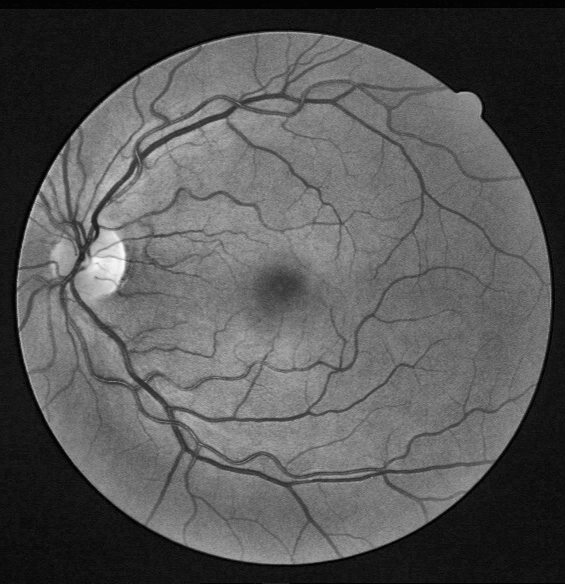

In [261]:
Image.fromarray(imagegray)

In [262]:
# dataCube = scipy.ndimage.filters.gaussian_filter(dataCube, sigma, truncate=8)
data = scipy.ndimage.convolve(imagegray, opticfilter/opticfilter.sum())
# data = scipy.ndimage.convolve(grayblur, img/img.sum())
# print('imagegray', type(imagegray))
# print('img', type(img))
# scipy.ndimage.correlate(image, disk, mode='constant').transpose()

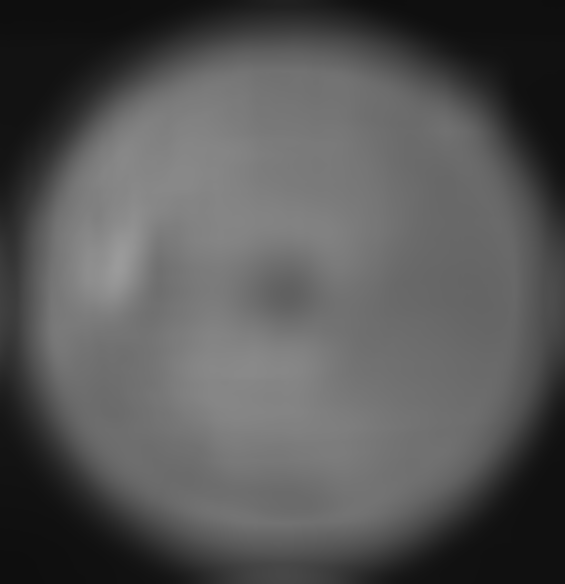

In [263]:
Image.fromarray(data)

In [264]:
max_number = np.max(data)-10
max_number

145

In [265]:
max_indices = np.array(list(zip(*np.where(data>=max_number))))
max_indices

array([[228, 131],
       [228, 132],
       [229, 129],
       ...,
       [291, 111],
       [291, 112],
       [291, 113]])

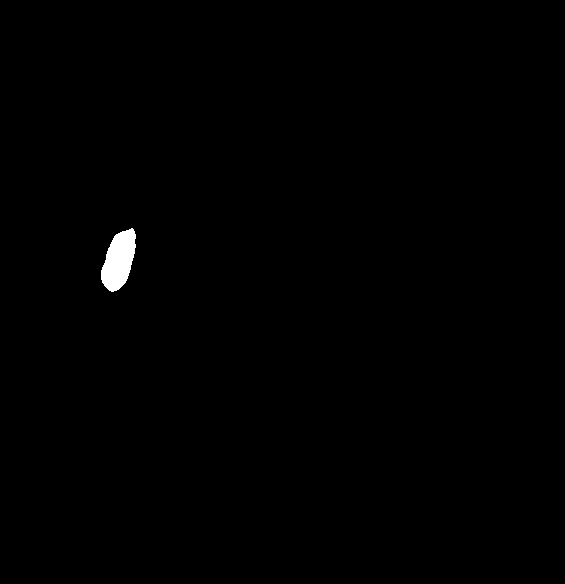

In [266]:
arr1 = np.zeros_like(imagegray)
arr1[max_indices[:,0], max_indices[:,1]] = 255
Image.fromarray(arr1)

In [267]:
min_number = np.min(data)

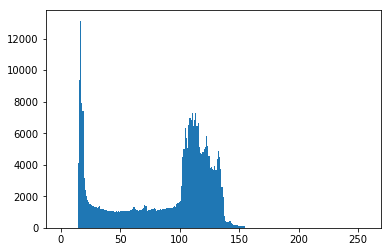

In [268]:
plt.hist(data.ravel(),256,[0,256]); plt.show()

In [269]:
# data2 = data.copy()
max_number_list  = np.where(data == max_number)

In [270]:
data1 = data.copy()
data1[data1<(max_number-10)]= 0
data1[data1>=(max_number-10)]=255

In [271]:
max_number_list

(array([228, 228, 229, 229, 229, 229, 229, 230, 230, 230, 230, 230, 230,
        230, 230, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231,
        231, 232, 232, 232, 232, 232, 232, 232, 233, 233, 233, 233, 234,
        234, 234, 234, 234, 235, 235, 235, 235, 236, 236, 236, 237, 237,
        238, 238, 238, 238, 239, 239, 240, 240, 240, 241, 241, 242, 242,
        242, 243, 243, 244, 244, 244, 245, 245, 246, 246, 247, 247, 248,
        248, 249, 249, 250, 250, 251, 251, 251, 252, 252, 253, 253, 254,
        254, 254, 255, 255, 255, 256, 256, 257, 257, 258, 258, 259, 259,
        260, 260, 260, 261, 261, 262, 262, 263, 263, 263, 264, 264, 264,
        265, 265, 266, 266, 266, 267, 267, 267, 268, 268, 268, 269, 269,
        270, 270, 271, 271, 271, 272, 272, 272, 273, 273, 274, 274, 274,
        275, 275, 275, 276, 276, 277, 277, 277, 278, 278, 278, 279, 279,
        279, 280, 280, 280, 281, 281, 281, 282, 282, 282, 282, 283, 283,
        283, 284, 284, 285, 285, 285, 286, 286, 286

In [272]:
imagegray

array([[ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       ...,
       [12, 12, 12, ..., 21, 21, 18],
       [12, 12, 12, ..., 18, 15, 15],
       [15, 15, 15, ...,  3,  3,  4]], dtype=uint8)

In [273]:
opticfilter

array([[ 80,  77,  73, ..., 102, 102, 102],
       [ 90,  83,  74, ...,  98,  99, 102],
       [ 94,  91,  82, ...,  99,  98,  97],
       ...,
       [ 87,  93,  96, ...,  80,  81,  84],
       [ 80,  81,  87, ...,  86,  82,  80],
       [ 79,  80,  79, ...,  84,  82,  84]], dtype=uint8)

In [274]:
a = np.array([[1,2,3], [4,5,6]])

In [275]:
Image.fromarray

<function PIL.Image.fromarray>

In [276]:
arr

NameError: name 'arr' is not defined

In [277]:
current_ix = max_indices[0]

vessel_ratio_current 0.135
vessel_ratio 0
vessel_ratio_current 0.1325
vessel_ratio 0.135
vessel_ratio_current 0.13166666666666665
vessel_ratio 0.135
vessel_ratio_current 0.131875
vessel_ratio 0.135
vessel_ratio_current 0.1315
vessel_ratio 0.135
vessel_ratio_current 0.1325
vessel_ratio 0.135
vessel_ratio_current 0.13357142857142856
vessel_ratio 0.135
vessel_ratio_current 0.1346875
vessel_ratio 0.135
vessel_ratio_current 0.13472222222222222
vessel_ratio 0.135
vessel_ratio_current 0.134
vessel_ratio 0.135
vessel_ratio_current 0.13454545454545455
vessel_ratio 0.135
vessel_ratio_current 0.135
vessel_ratio 0.135
vessel_ratio_current 0.1348076923076923
vessel_ratio 0.135
vessel_ratio_current 0.13482142857142856
vessel_ratio 0.135
vessel_ratio_current 0.135
vessel_ratio 0.135
vessel_ratio_current 0.1346875
vessel_ratio 0.135
vessel_ratio_current 0.13558823529411765
vessel_ratio 0.135
vessel_ratio_current 0.1363888888888889
vessel_ratio 0.13558823529411765
vessel_ratio_current 0.137105263157894

vessel_ratio_current 0.1596516393442623
vessel_ratio 0.15952479338842976
vessel_ratio_current 0.15977642276422765
vessel_ratio 0.1596516393442623
vessel_ratio_current 0.15981854838709678
vessel_ratio 0.15977642276422765
vessel_ratio_current 0.15988
vessel_ratio 0.15981854838709678
vessel_ratio_current 0.15990079365079365
vessel_ratio 0.15988
vessel_ratio_current 0.15998031496062992
vessel_ratio 0.15990079365079365
vessel_ratio_current 0.16005859375
vessel_ratio 0.15998031496062992
vessel_ratio_current 0.16007751937984496
vessel_ratio 0.16005859375
vessel_ratio_current 0.16009615384615383
vessel_ratio 0.16007751937984496
vessel_ratio_current 0.1601526717557252
vessel_ratio 0.16009615384615383
vessel_ratio_current 0.16018939393939394
vessel_ratio 0.1601526717557252
vessel_ratio_current 0.16020676691729324
vessel_ratio 0.16018939393939394
vessel_ratio_current 0.16024253731343283
vessel_ratio 0.16020676691729324
vessel_ratio_current 0.1602962962962963
vessel_ratio 0.16024253731343283
vesse

vessel_ratio_current 0.1648728813559322
vessel_ratio 0.1647340425531915
vessel_ratio_current 0.16490506329113924
vessel_ratio 0.1648728813559322
vessel_ratio_current 0.16492647058823529
vessel_ratio 0.16490506329113924
vessel_ratio_current 0.16490585774058578
vessel_ratio 0.16492647058823529
vessel_ratio_current 0.16490625
vessel_ratio 0.16492647058823529
vessel_ratio_current 0.16490663900414937
vessel_ratio 0.16492647058823529
vessel_ratio_current 0.1649276859504132
vessel_ratio 0.16492647058823529
vessel_ratio_current 0.16498971193415637
vessel_ratio 0.1649276859504132
vessel_ratio_current 0.16501024590163935
vessel_ratio 0.16498971193415637
vessel_ratio_current 0.16501020408163267
vessel_ratio 0.16501024590163935
vessel_ratio_current 0.16505081300813007
vessel_ratio 0.16501024590163935
vessel_ratio_current 0.16506072874493927
vessel_ratio 0.16505081300813007
vessel_ratio_current 0.1651008064516129
vessel_ratio 0.16506072874493927
vessel_ratio_current 0.16509036144578312
vessel_ratio

vessel_ratio_current 0.16789285714285715
vessel_ratio 0.16781518624641834
vessel_ratio_current 0.16795584045584044
vessel_ratio 0.16789285714285715
vessel_ratio_current 0.16801846590909092
vessel_ratio 0.16795584045584044
vessel_ratio_current 0.16808073654390934
vessel_ratio 0.16801846590909092
vessel_ratio_current 0.16814265536723164
vessel_ratio 0.16808073654390934
vessel_ratio_current 0.1681619718309859
vessel_ratio 0.16814265536723164
vessel_ratio_current 0.16816011235955056
vessel_ratio 0.1681619718309859
vessel_ratio_current 0.16817226890756304
vessel_ratio 0.1681619718309859
vessel_ratio_current 0.16818435754189945
vessel_ratio 0.16817226890756304
vessel_ratio_current 0.16823816155988858
vessel_ratio 0.16818435754189945
vessel_ratio_current 0.16830555555555557
vessel_ratio 0.16823816155988858
vessel_ratio_current 0.16833795013850417
vessel_ratio 0.16830555555555557
vessel_ratio_current 0.16839779005524863
vessel_ratio 0.16833795013850417
vessel_ratio_current 0.16858126721763086


vessel_ratio_current 0.17359071274298057
vessel_ratio 0.17353896103896105
vessel_ratio_current 0.1736530172413793
vessel_ratio 0.17359071274298057
vessel_ratio_current 0.17371505376344085
vessel_ratio 0.1736530172413793
vessel_ratio_current 0.17376609442060087
vessel_ratio 0.17371505376344085
vessel_ratio_current 0.17382226980728052
vessel_ratio 0.17376609442060087
vessel_ratio_current 0.17389957264957265
vessel_ratio 0.17382226980728052
vessel_ratio_current 0.17396055437100214
vessel_ratio 0.17389957264957265
vessel_ratio_current 0.17400531914893616
vessel_ratio 0.17396055437100214
vessel_ratio_current 0.1740552016985138
vessel_ratio 0.17400531914893616
vessel_ratio_current 0.1741101694915254
vessel_ratio 0.1740552016985138
vessel_ratio_current 0.17413319238900635
vessel_ratio 0.1741101694915254
vessel_ratio_current 0.1741350210970464
vessel_ratio 0.17413319238900635
vessel_ratio_current 0.17415263157894736
vessel_ratio 0.1741350210970464
vessel_ratio_current 0.17417542016806722
vesse

vessel_ratio_current 0.1767751736111111
vessel_ratio 0.1769043321299639
vessel_ratio_current 0.17679376083188908
vessel_ratio 0.1769043321299639
vessel_ratio_current 0.1768425605536332
vessel_ratio 0.1769043321299639
vessel_ratio_current 0.17687392055267703
vessel_ratio 0.1769043321299639
vessel_ratio_current 0.17691810344827585
vessel_ratio 0.1769043321299639
vessel_ratio_current 0.17695352839931153
vessel_ratio 0.17691810344827585
vessel_ratio_current 0.1770017182130584
vessel_ratio 0.17695352839931153
vessel_ratio_current 0.1770025728987993
vessel_ratio 0.1770017182130584
vessel_ratio_current 0.1769820205479452
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1769957264957265
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17697525597269625
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17695485519591142
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1769515306122449
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17696519524617996
vessel_ratio 0.

vessel_ratio_current 0.17589492753623187
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17586468885672937
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17585982658959537
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17585137085137084
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.175842939481268
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17585251798561152
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1758477011494253
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17583931133428982
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17583094555873927
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17583333333333334
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.175825
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17583095577746077
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17582264957264956
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17580369843527738
vessel_ratio 0.177002572

vessel_ratio_current 0.17410336239103363
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17408271144278606
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17406832298136646
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17405397022332506
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17403035935563815
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1740006188118812
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17398949320148333
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17398456790123457
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17396424167694205
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17394704433497538
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1739360393603936
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17391584766584767
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17389263803680982
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17386948529411764
vessel_ratio

vessel_ratio_current 0.1724235807860262
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17240458015267177
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17237200435729846
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17233949945593036
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17231521739130434
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17229913137893593
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1722885032537961
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1722860238353196
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1722754329004329
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17225405405405406
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17224082073434124
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17221952535059332
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1722144396551724
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17219590958019376
vessel_ratio 0.

vessel_ratio_current 0.17072157434402332
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17071844660194174
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17076139670223084
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17076308139534885
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17075750242013552
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17075435203094777
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17074396135265701
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17073117760617762
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17071600771456125
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17069364161849712
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1706737247353224
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17066346153846154
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17064841498559077
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17063579654510558
vessel_rati

vessel_ratio_current 0.17029553415061296
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1702952755905512
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17030375874125875
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1704410480349345
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1705650087260035
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17062990409764603
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17067726480836237
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17071148825065274
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17073913043478262
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17075803649000867
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17077039930555554
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1707827406764961
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1707863951473137
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1707943722943723
vessel_ratio 0.1

vessel_ratio_current 0.1738455414012739
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17393396976929196
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17400039745627982
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17404289118347896
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1740734126984127
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17410190325138777
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17412638668779715
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17415479018210608
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1741791930379747
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17420158102766797
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.1742219589257504
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17425019731649566
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17426261829652998
vessel_ratio 0.1770025728987993
vessel_ratio_current 0.17427107959022853
vessel_ratio 0

vessel_ratio_current 0.1775310445580716
vessel_ratio 0.17751827485380117
vessel_ratio_current 0.17754379562043796
vessel_ratio 0.1775310445580716
vessel_ratio_current 0.1775601750547046
vessel_ratio 0.17754379562043796
vessel_ratio_current 0.1775819970845481
vessel_ratio 0.1775601750547046
vessel_ratio_current 0.17760378732702112
vessel_ratio 0.1775819970845481
vessel_ratio_current 0.17763100436681223
vessel_ratio 0.17760378732702112
vessel_ratio_current 0.17769272727272728
vessel_ratio 0.17763100436681223
vessel_ratio_current 0.17776889534883722
vessel_ratio 0.17769272727272728
vessel_ratio_current 0.1778267973856209
vessel_ratio 0.17776889534883722
vessel_ratio_current 0.17788098693759072
vessel_ratio 0.1778267973856209
vessel_ratio_current 0.17794234952864393
vessel_ratio 0.17788098693759072
vessel_ratio_current 0.1780018115942029
vessel_ratio 0.17794234952864393
vessel_ratio_current 0.17804851556842868
vessel_ratio 0.1780018115942029
vessel_ratio_current 0.17808972503617945
vessel_

[0, 565, 584, 0]

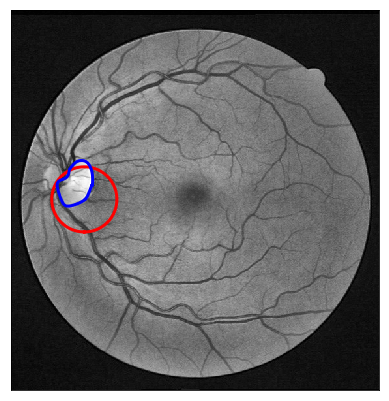

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
# from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

vessel_count = 0
non_vessel_count = 0
vessel_ratio = 0
vessel_aggregate = 0

img = rgb2gray(img)
for i in zip(max_indices):
    vessel_ratio_current = 0
    s = np.linspace(0, 2*np.pi, 400)
    y = i[0][0] + 50*np.cos(s)
    x = i[0][1] + 50*np.sin(s)
    init = np.array([x, y]).T

    snake = active_contour(gaussian(imagegray, 3),
                           init, alpha=0.015, beta=10, gamma=0.001)

    for j in init:
        if segmented_image1[int(j[0]), int(j[1])] ==255:
            vessel_count += 1
        if segmented_image1[int(j[0]), int(j[1])] ==0:
            non_vessel_count += 1
        vessel_ratio_current = vessel_count/(vessel_count+non_vessel_count)
#     for j in init:
#         vessel_aggregate += segmented_image1[int(j[0]), int(j[1])] 
        
#     vessel_ratio_current = vessel_aggregate/len(init) 
    print('vessel_ratio_current', vessel_ratio_current)
    print('vessel_ratio', vessel_ratio)
    if vessel_ratio_current > vessel_ratio:
        p = i[0][0]
        q = i[0][1]
        vessel_ratio = vessel_ratio_current
    
print('p', p,'q', q)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(imagegray, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '-r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, imagegray.shape[1], imagegray.shape[0], 0])


In [290]:
print(len(init))

400


In [ ]:
ig = imagegray.copy()
ig[segmented_image1==255] = max_number
Image.fromarray(ig)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(imagegray, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '-r', lw=3)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(init[:, 0], init[:, 1], '-r', lw=3)

In [ ]:
 max_number_list = max_number_list.T

In [ ]:
for i in zip(max_indices):
    print(i[0][1])    

In [ ]:
for i, j in max_indices:
    print(type(i))

In [187]:
vessel_ratio

0.1575

In [ ]:
non_vessel_count

In [41]:
# define the list of boundaries
boundaries = [
    ([200, 200, 0], [255, 255, 25])
]
# define the list of boundaries
boundaries = [
    ([17, 15, 100], [50, 56, 200]),
    ([86, 31, 4], [220, 88, 50]),
    ([25, 146, 190], [62, 174, 250]),
    ([103, 86, 65], [145, 133, 128])
]

In [42]:
# loop over the boundaries
for (lower, upper) in boundaries:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
 
    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
 
    # show the images
#     Image.fromarray([image, output])
    cv2.imshow("images", np.hstack([image, output]))
    cv2.waitKey(0)

error: OpenCV(4.0.0) /io/opencv/modules/core/src/arithm.cpp:1736: error: (-209:Sizes of input arguments do not match) The lower boundary is neither an array of the same size and same type as src, nor a scalar in function 'inRange'


In [43]:
 python detect_color.py --image pokemon_games.png

SyntaxError: invalid syntax (<ipython-input-43-55e9594b0ce1>, line 1)

In [44]:
mask.shape()

NameError: name 'mask' is not defined

In [45]:
from turtle import *
import math

apple = Turtle()

def polygon(t, n, length):
    for i in range(n):
        left(360/n)
        forward(length)

In [ ]:
from tkinter import *
root = Tk()
root.geometry("500x900")
canvas = Canvas(root, width=550, height=820)
canvas.pack()
png = PhotoImage(file = r'example.png') # Just an example
canvas.create_image(0, 0, image = png, anchor = "nw")

a = canvas.create_rectangle(50, 0, 50, 0, fill='red')
canvas.move(a, 20, 20)

In [8]:
import numpy as np
import cv2
from PIL import Image

In [56]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
# img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

In [57]:
img = cv2.rectangle(img,(0, 0),(25,25),(255,255,0),3)

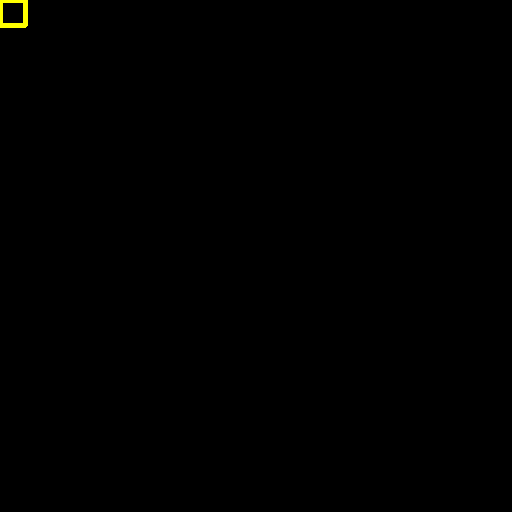

In [58]:
Image.fromarray(img)

In [24]:
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

In [13]:
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

In [14]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html

SyntaxError: invalid syntax (<ipython-input-14-bb167be74ef5>, line 3)

In [15]:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html

SyntaxError: invalid syntax (<ipython-input-15-8c37772e248a>, line 1)

In [76]:
 # yellow color
colorLower = np.array([100, 100, 0], dtype = "uint8")
colorUpper = np.array([255, 255, 150], dtype = "uint8")
# hsv_img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
red_mask = cv2.inRange(image, colorLower, colorUpper)
red = cv2.bitwise_and(image, image, mask=red_mask)

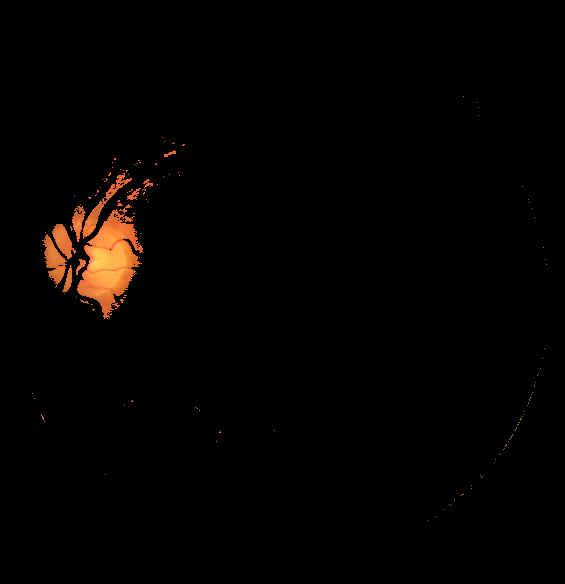

In [77]:
# np.unique(red_mask,return_counts=True)
Image.fromarray(red)

In [68]:
#  # Blue color
# low_blue = np.array([94, 80, 2])
# high_blue = np.array([126, 255, 255])
# blue_mask = cv2.inRange(image, low_blue, high_blue)
# blue = cv2.bitwise_and(image, image, mask=blue_mask)

# # Green color
# low_green = np.array([25, 52, 72])
# high_green = np.array([102, 255, 255])
# green_mask = cv2.inRange(image, low_green, high_green)
# green = cv2.bitwise_and(image, image, mask=green_mask)

# # Every color except white
# low = np.array([0, 42, 0])
# high = np.array([179, 255, 255])
# mask = cv2.inRange(image, low, high)
# result = cv2.bitwise_and(image, image, mask=mask)

In [10]:
cv2.imshow("image", image)
cv2.imshow("Red", red)
# cv2.imshow("Blue", blue)
# cv2.imshow("Green", green)
cv2.imshow("Result", result)
    

NameError: name 'result' is not defined

In [49]:
Gaussian = cv2.getGaussianKernel(ksize=[1,1],sigma=1)

TypeError: an integer is required (got type list)

In [48]:
# from PIL import Image
# import scipy.ndimage
# import numpy as np
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2

# # radius = 5
# img = np.zeros((3,3,3))
# # disk = img
# disk = cv2.circle(img,(1,1), 1, (255,255,255), -1)
# # r = 10
# # y,x = np.ogrid[-r: r+1, -r: r+1]
# # disk = x**2+y**2 <= r**2
# # disk = disk.astype(float)
# # Gauss = np.random.normal(51,51, 3)
# GaussFilt = scipy.ndimage.gaussian_filter(img, sigma = [4,4,1])
# # Gussi = scipy.ndimage.gaussian_filter(disk, sigma = 1)

# print(GaussFilt.shape)
# print(disk.shape)
# gaussianyellow = img * GaussFilt

# # Image.fromarray(img.astype(np.uint8))
# imagegray = image[:,:,1]
# # circlegray = img[:,:,1]/255
# Image.fromarray(img[:,:,0].astype(np.uint8))

# data = scipy.ndimage.convolve(imagegray, img[:,:,0])

(3, 3, 3)
(3, 3, 3)
